<a href="https://colab.research.google.com/github/MariaReneeGonzalezBravo/SIMULACION-1/blob/main/ProyectoDeInversion_Aplicacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto de inversión $\pi$

*   30/06/24


*   González Bravo María Renée

### Solución Analítica

**Problema:** Simulación de un portafolio de inversiones con dos activos: Amazon y Apple.

Suponemos que queremos simular el rendimiento del portafolio utilizando retornos históricos. Vamos a definir el problema de la siguiente manera:

**Datos:**
- Retornos esperados de Amazon $ \mu_A $ y Apple $ \mu_B $.
- Desviaciones estándar de los retornos $ \sigma_A $ y $ \sigma_B $.
- Correlación entre los activos $ \rho $.

**Cálculo de rendimientos esperados y riesgo del portafolio:**

- Retorno esperado del portafolio:
  $
  \mu_P = w_A \mu_A + w_B \mu_B
  $
- Riesgo del portafolio (desviación estándar):
  $
  \sigma_P = \sqrt{(w_A \sigma_A)^2 + (w_B \sigma_B)^2 + 2 w_A w_B \sigma_A \sigma_B \rho}
  $

  donde $ w_A $ y $ w_B $ son los pesos de Amazon y Apple en el portafolio, respectivamente.


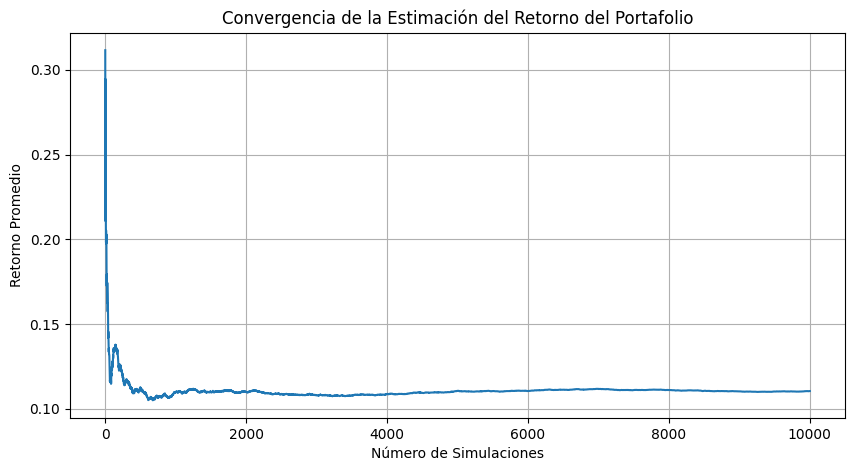

Retorno promedio del portafolio: 0.1104
Desviación estándar del portafolio: 0.1322
Intervalo de confianza del 95%: (0.10785559753668163, 0.1130388703300879)


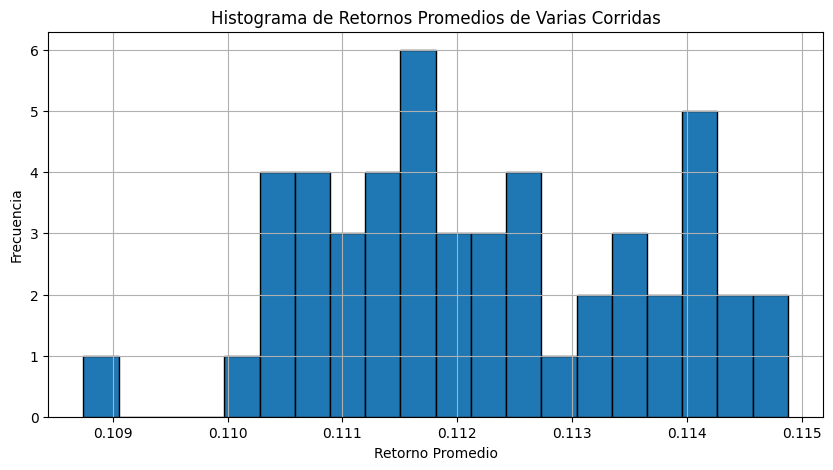

KS Test statistic: 0.0125, p-value: 0.0876


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, kstest

# Parámetros del portafolio
mu_A = 0.12    # Retorno esperado de Amazon
sigma_A = 0.20  # Desviación estándar de Amazon
mu_B = 0.10    # Retorno esperado de Apple
sigma_B = 0.15  # Desviación estándar de Apple
rho = 0.5      # Correlación entre Amazon y Apple
w_A = 0.6      # Peso de Amazon en el portafolio
w_B = 0.4      # Peso de Apple en el portafolio

# Simulación de N escenarios
N = 10000
np.random.seed(0)

# Generar retornos simulados para Amazon y Apple
returns_A = np.random.normal(mu_A, sigma_A, N)
returns_B = np.random.normal(mu_B, sigma_B, N)

# Matriz de covarianza
cov_matrix = [[sigma_A**2, rho * sigma_A * sigma_B], [rho * sigma_A * sigma_B, sigma_B**2]]

# Generar retornos del portafolio
portfolio_returns = w_A * returns_A + w_B * returns_B

# Gráfica de convergencia de la estimación
cumulative_returns = np.cumsum(portfolio_returns) / (np.arange(N) + 1)
plt.figure(figsize=(10, 5))
plt.plot(cumulative_returns)
plt.title('Convergencia de la Estimación del Retorno del Portafolio')
plt.xlabel('Número de Simulaciones')
plt.ylabel('Retorno Promedio')
plt.grid(True)
plt.show()

# Intervalo de confianza del 95%
mean_return = np.mean(portfolio_returns)
std_return = np.std(portfolio_returns)
confidence_interval = norm.interval(0.95, loc=mean_return, scale=std_return/np.sqrt(N))

print(f"Retorno promedio del portafolio: {mean_return:.4f}")
print(f"Desviación estándar del portafolio: {std_return:.4f}")
print(f"Intervalo de confianza del 95%: {confidence_interval}")

# Varias corridas de la simulación
num_runs = 50
all_mean_returns = []

for _ in range(num_runs):
    returns_A = np.random.normal(mu_A, sigma_A, N)
    returns_B = np.random.normal(mu_B, sigma_B, N)
    portfolio_returns = w_A * returns_A + w_B * returns_B
    all_mean_returns.append(np.mean(portfolio_returns))

plt.figure(figsize=(10, 5))
plt.hist(all_mean_returns, bins=20, edgecolor='black')
plt.title('Histograma de Retornos Promedios de Varias Corridas')
plt.xlabel('Retorno Promedio')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Comprobación de distribución normal
kstest_result = kstest(portfolio_returns, 'norm', args=(mean_return, std_return))
print(f"KS Test statistic: {kstest_result.statistic:.4f}, p-value: {kstest_result.pvalue:.4f}")
